 파이썬 os모듈은 시스템 명령어들이 담긴 패키지입니다.(https://wikidocs.net/3141)

In [46]:
import os

os.path.join은 두 경로를 이어줄 때 사용하는 함수입니다.
OS에 따라서 두 경로를 이을 때 '/'를 쓸 때도 있고 '\\'를 쓸때도 있는 등 형식이 다양한데, os.path.join 함수는 사용중인 OS에 맞게 경로를 이어줍니다.

In [47]:
a = '/aaa'
b = 'bbb'
c = '/aaa/bbb'

print(os.path.join(a, b))

print(c)

/aaa/bbb
/aaa/bbb


os.mkdir은 빈 디렉터리를 생성하는 함수입니다.

절대경로를 입력하면 해당경로에, 상대경로를 입력하면 현재 작업중인 디렉터리에 생성합니다.

In [48]:
os.mkdir('/testdir1')
os.mkdir('testdir2')

FileExistsError: ignored

os.path.exists 함수는 해당 경로명에 해당하는 파일이나 디렉터리가 존재하면 참을, 존재하지 않으면 거짓을 반환합니다.

In [49]:
print(os.path.exists('/testdir1'))
print(os.path.exists('/testdir3'))

True
False


os.listdir은 입력경로에 존재하는 모든 파일과 디렉터리를 리스트 형태로 반환해주는 함수입니다.


In [50]:
os.listdir('/')

['etc',
 'usr',
 'media',
 'sys',
 'proc',
 'opt',
 'var',
 'sbin',
 'bin',
 'lib64',
 'tmp',
 'home',
 'lib',
 'run',
 'boot',
 'mnt',
 'root',
 'dev',
 'srv',
 'content',
 'testdir1',
 '.dockerenv',
 'datalab',
 'tools',
 'swift',
 'tensorflow-1.15.2',
 'lib32']

opencv는 이미지 입출력, 처리와 관련된 패키지입니다.
먼저 예제 실행을 위해 적당한 이미지 하나를 Colab에 업로드한 뒤 읽어와봅니다.

In [51]:
import cv2

# img = cv2.imread('파일명')
img = cv2.imread('Lenna.png')

print(img.shape)

(220, 220, 3)


이미지를 출력해봅니다. Colab에서는 cv2.imshow를 block 해놨습니다.

대신 matplotlib를 이용해 영상을 출력합니다.

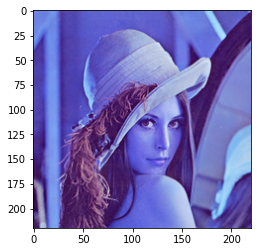

In [52]:
import matplotlib.pyplot as plt

plt.imshow(img)

cv2는 이미지를 BGR 형식으로 불러옵니다.

RGB 형식으로 변환해줍니다.

In [53]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.resize 함수로 영상을 Resize 해봅니다.

(220, 220, 3)


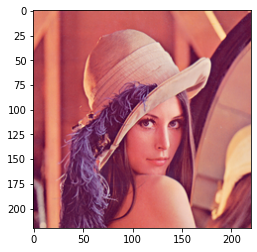

(256, 256, 3)


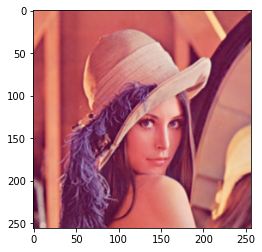

In [54]:
h = img.shape[0]
w = img.shape[1]

if h > w: # 배율을 유지하면서 resize합니다.
  img_resized = cv2.resize(img, (256, int(h / w * 256)), interpolation = cv2.INTER_LINEAR)
else:
  img_resized = cv2.resize(img, (int(w / h * 256), 256), interpolation=cv2.INTER_LINEAR)

 # resize한 결과물 출력
print(img.shape)
plt.imshow(img)
plt.show()

print(img_resized.shape)
plt.imshow(img_resized)
plt.show()

영상을 crop 해봅니다. crop은 별도의 함수 사용없이 numpy 슬라이싱으로 직접해주는게 더 자유롭고 쉽습니다.

(256, 128, 3)


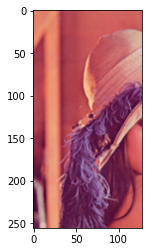

(128, 256, 3)


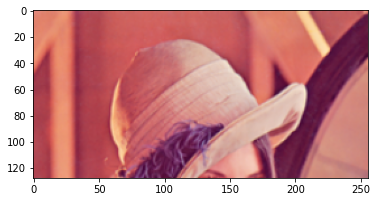

In [55]:
h, w, _ = img_resized.shape # resize된 이미지의 높이, 너비를 다시 구합니다.

img_croped_1 = img_resized[:, :w//2] # 좌측 절반을 잘라봅니다.
img_croped_2 = img_resized[:h//2, :] # 상측 절반을 잘라봅니다.

print(img_croped_1.shape)
plt.imshow(img_croped_1)
plt.show()

print(img_croped_2.shape)
plt.imshow(img_croped_2)
plt.show()

cv2.flip 함수로 영상을 상하, 좌우로 반전시켜 봅니다.

(256, 256, 3)


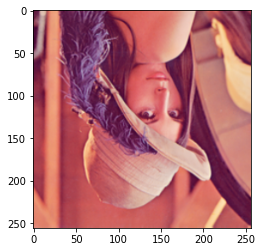

(256, 256, 3)


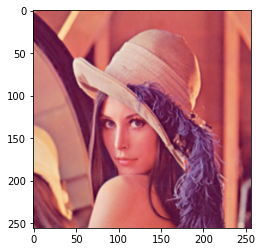

In [56]:
img_fliped_1 = cv2.flip(img_resized, 0) 
# 두번째 인자는 반전 시킬 차원입니다. 0은 y축이므로 상하반전이 일어납니다.
img_fliped_2 = cv2.flip(img_resized, 1)
# 두번째 인자는 반전 시킬 차원입니다. 1은 x축이므로 좌우반전이 일어납니다.

print(img_fliped_1.shape) # 단지 반전만 시켰을 뿐이므로 영상의 shape는 유지됩니다.
plt.imshow(img_fliped_1)
plt.show()

print(img_fliped_2.shape) # 단지 반전만 시켰을 뿐이므로 영상의 shape는 유지됩니다.
plt.imshow(img_fliped_2)
plt.show()

생성한 이미지들을 저장해봅니다. cv2는 BGR형식으로 저장하므로 다시 BGR로 바꿔줍니다.

In [58]:
cv2.imwrite('img_croped_1.jpg', cv2.cvtColor(img_croped_1, cv2.COLOR_RGB2BGR))
cv2.imwrite('img_croped_2.jpg', cv2.cvtColor(img_croped_2, cv2.COLOR_RGB2BGR))
cv2.imwrite('img_fliped_1.jpg', cv2.cvtColor(img_fliped_1, cv2.COLOR_RGB2BGR))
cv2.imwrite('img_fliped_2.jpg', cv2.cvtColor(img_fliped_2, cv2.COLOR_RGB2BGR))

True